In [40]:
import pandas as pd 
import numpy as np

In [41]:
ec = pd.read_csv('ecommerce_consumers.csv')

In [42]:
ec.head()

,ratio,time,label
0,0.54,17.2,female
1,0.93,18.2,male
2,0.84,13.6,female
3,0.19,6.0,male
4,0.89,13.2,female


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [44]:
le = LabelEncoder()
var_mod = ec.select_dtypes(include='object').columns
for i in var_mod:
    ec[i] = le.fit_transform(ec[i])


In [45]:
ec.head()

,ratio,time,label
0,0.54,17.2,0
1,0.93,18.2,1
2,0.84,13.6,0
3,0.19,6.0,1
4,0.89,13.2,0


In [46]:
# Putting feature variable to X
X = ec.drop(['label'],axis=1)

# Putting response variable to y
y = ec['label']

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred = logreg.predict(X_test)

In [50]:
metrics.accuracy_score( y_test, y_pred)

0.7

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.70      1.00      0.82        42

    accuracy                           0.70        60
   macro avg       0.35      0.50      0.41        60
weighted avg       0.49      0.70      0.58        60



In [52]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [53]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8666666666666667
precision 0.9722222222222222
recall 0.8333333333333334


In [56]:
# using rbf kernel, C=1, default value of gamma

model1 = SVC(C = 1, kernel='linear')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [57]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.7
precision 0.7
recall 1.0


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

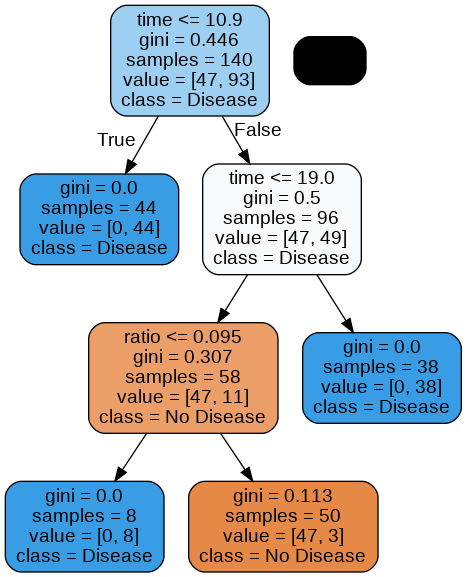

In [61]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [62]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.95


array([[18,  0],
       [ 3, 39]])